#### We import some necessary libraries and the data set thereafter.

In [1]:
import os
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 
%matplotlib inline

In [113]:
df = pd.read_csv(r'Wine_Quality_Data.csv')

In [114]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
## Here we check our data types in the data frame created. We see that all our columns are float or int except the y variable.
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

##### We define our y variable as the color and encode the values of the color variable. We make 'red' as 1 and 'white' as 0

In [6]:
df['color'].unique()

array(['red', 'white'], dtype=object)

In [7]:
#Values have been changed.
df.replace(to_replace={'red':1,'white':0},inplace=True)

In [8]:
y=df['color']
fields=df.iloc[:,:-1]

In [9]:
fields.shape

(6497, 12)

##### Now we find the correlations of each of the features with the target variable y

In [10]:
correlations=pd.Series(dtype=float)
cols=fields.columns.to_list()

correlations=df[cols].corrwith(y)
correlations.sort_values(ascending=True)
abs_corr = correlations.apply(lambda x: abs(x))

#### Hence we have the correlations and their absolute values in the series named abs_Corr

In [11]:
abs_corr.sort_values(inplace=True,ascending=False)
abs_corr

total_sulfur_dioxide    0.700357
volatile_acidity        0.653036
chlorides               0.512678
sulphates               0.487218
fixed_acidity           0.486740
free_sulfur_dioxide     0.471644
density                 0.390645
residual_sugar          0.348821
pH                      0.329129
citric_acid             0.187397
quality                 0.119323
alcohol                 0.032970
dtype: float64

#### Here we create a barplot of the correlations

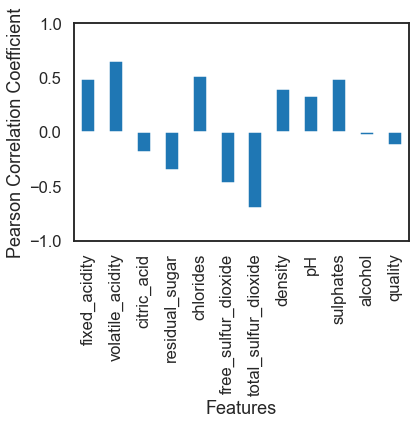

In [55]:
sns.set_context('talk')
sns.set_style('white')
ax=correlations.plot(kind='bar')
ax.set(ylabel='Pearson Correlation Coefficient', xlabel='Features',ylim=[-1,1])
plt.show()

In [13]:
(np.array(correlations.index))

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

### Now we create a pairplot of the data we have.

In [14]:
sns.set_context('talk')
sns.set_style('white')

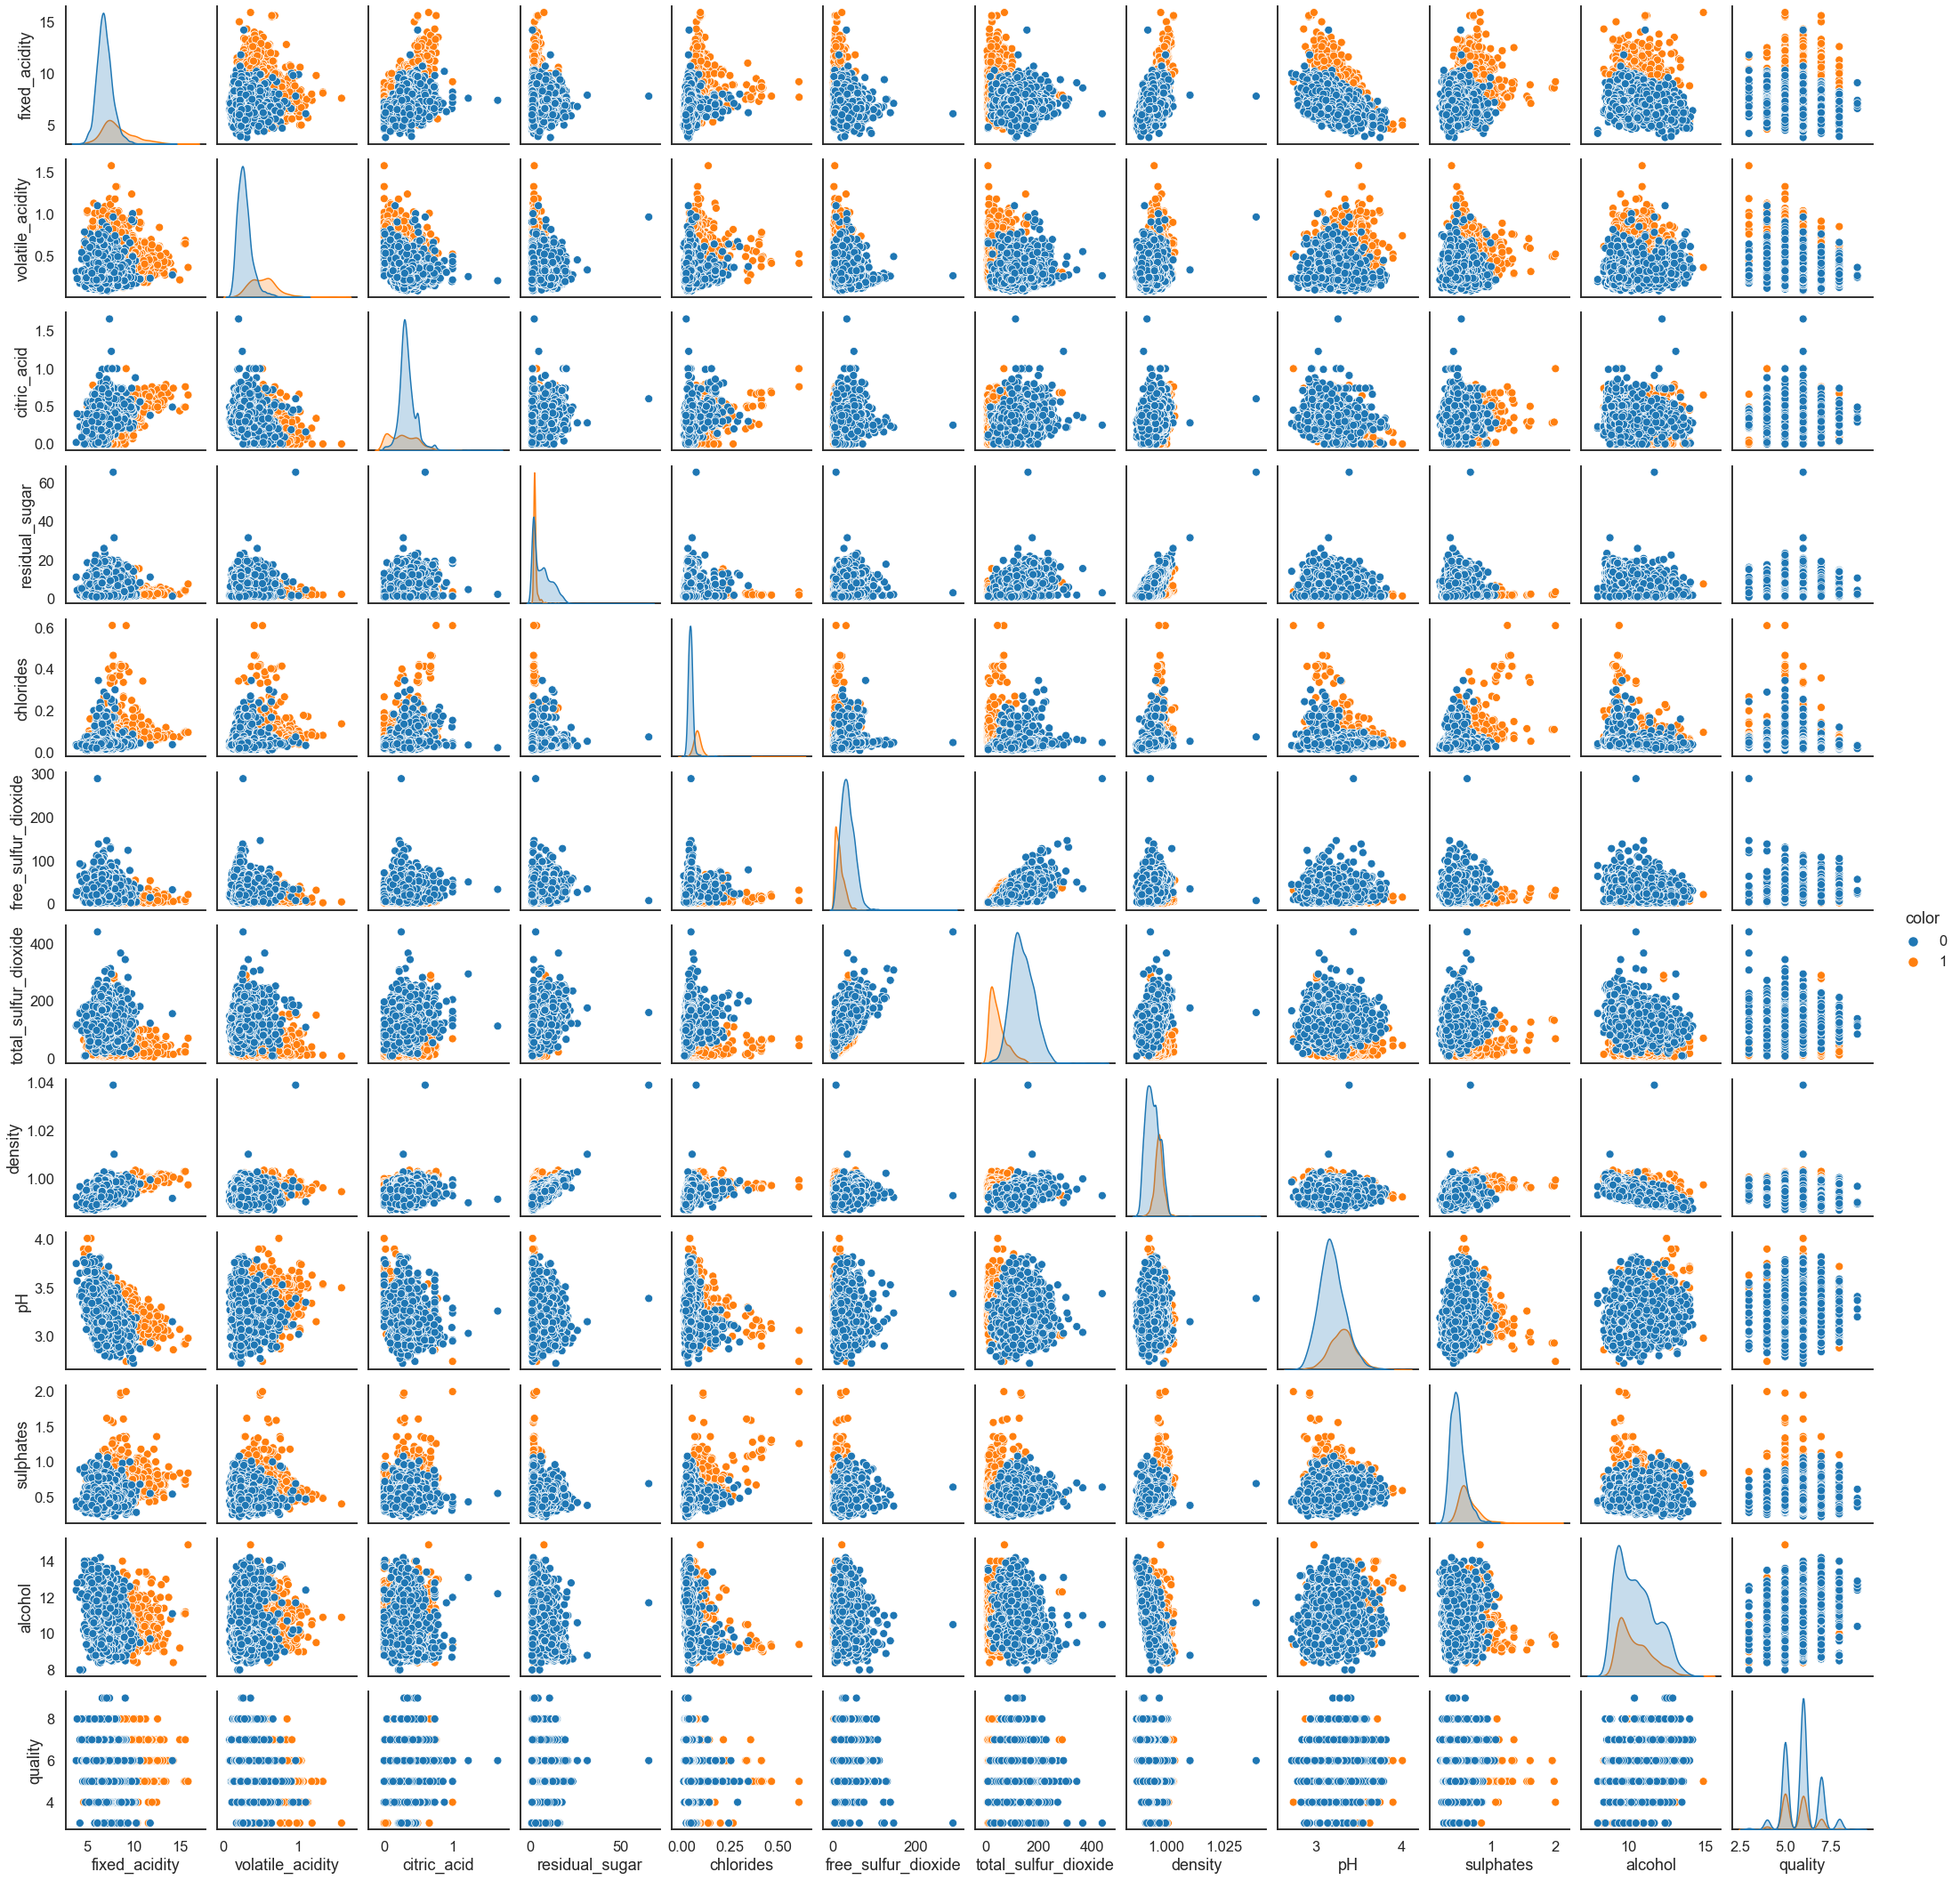

In [15]:
sns.pairplot(df,hue='color')

* We see from the scatter plots as well as the histograms that there seems to be some type of separation in the data in regards to our red wine and our white wine 
* Hence we try to fit a classifier to determine which wines are red and which wines are white.

#### In order to fit a linear decision boundary we just take the two most correlated features as our x data set. Also, we scale both the columns as volatile acidity ranges between 0&1 whereas the attribute 'total_sulfur_dioxide' ranges above 1.
#### Hence scaling is important to allow the algorithm to give equal weights to both the features as scaling is done in a foxed range. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. 

In [44]:
col = abs_corr.iloc[:2].index
x=df[col]
x

,total_sulfur_dioxide,volatile_acidity
0,34.0,0.70
1,67.0,0.88
2,54.0,0.76
3,60.0,0.28
4,34.0,0.70
...,...,...
6492,92.0,0.21
6493,168.0,0.32
6494,111.0,0.24
6495,110.0,0.29


In [45]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x=scalar.fit_transform(x)
x=pd.DataFrame(x,columns = ['%s_scaled' % fld for fld in col])
x

,total_sulfur_dioxide_scaled,volatile_acidity_scaled
0,0.064516,0.413333
1,0.140553,0.533333
2,0.110599,0.453333
3,0.124424,0.133333
4,0.064516,0.413333
...,...,...
6492,0.198157,0.086667
6493,0.373272,0.160000
6494,0.241935,0.106667
6495,0.239631,0.140000


#### Now we fit a linear Support vector model on our two dimensional data set (with only 2 features) 

In [47]:
from sklearn.svm import LinearSVC

#Fit the model
lsvm = LinearSVC()
lsvm.fit(x,y)

LinearSVC()

###### Now we take a sample of 300 from our x and y in order to see the fitting visually otherwise plotting a large number of data sets might make things confusing.

In [48]:
x_colour = x.sample(300,random_state=45)
y_colour = y.iloc[x_colour.index]
#[f(x) if condition else g(x) for x in sequence]
## With if condition only:- [f(x) for x in sequence if condition]
y_colour = y_colour.apply(lambda r : 'red' if r==1 else 'yellow')


In [49]:
y_colour

2691    yellow
5843    yellow
5509    yellow
2880    yellow
3286    yellow
         ...  
358        red
5724    yellow
1552       red
5746    yellow
64         red
Name: color, Length: 300, dtype: object

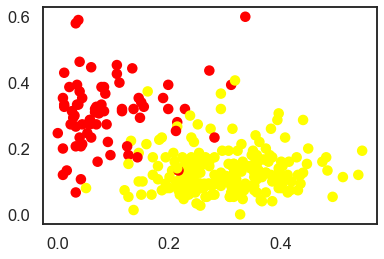

In [84]:
ax = plt.axes()
ax.scatter(x_colour.iloc[:,:1],x_colour.iloc[:, 1:],color=y_colour,alpha=1)

### Plotting the Linear Decisioon boundary on the scatter plot above

__Use of Meshgrid in numpy__

__a) Hence for every possible values of x and y we are gonna make predictions since we scaled both are columns of acidity and sulphar from 0 to 1. So we take each value of x and y and make our predictions.__

__b) We then plot a contour plot over the scatter plot plotted earlier; since predictions are {0,1} hence we the predictions with a linear boundary.__

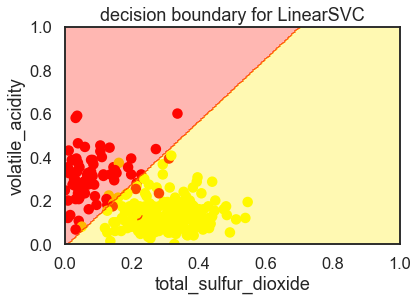

In [79]:
## here the contour plot is made after adding axes in the scatter plot created earlier. Some earlier steps are written again for a coninuous flow.
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC.fit(x, y)

x_color = x.sample(300, random_state=45)
y_color = y.loc[x_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    x_color.iloc[:, 0], x_color.iloc[:, 1],
    color=y_color, alpha=1)


# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_pred = LSVC.predict(X_grid)
y_pred = y_pred.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3) #It maps ones as red and zeroes as yellow
# -----------
ax.set(
    xlabel=col[0],
    ylabel=col[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

In [80]:
## hence we have the predictions of all the possible points or cordinates of x and y
y_pred

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

## Gaussian Kernels --> Non-linear Boundary classifiers

__Now we see how we fit the non linear classifiers using the famous Gaussian kernels.__

In [108]:
def plot_decision_boundary(estimator,x,y):
    estimator.fit(x,y)
    x_color = x.sample(300,random_state=50)
    y_color = y.iloc[x_color.index]
    y_color = y_color.apply(lambda r:'red' if r==1 else 'yellow')
    x_axis,y_axis=np.arange(0,1.005,0.005) , np.arange(0,1.005,0.005)
    xx,yy = np.meshgrid(x_axis,y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    x_grid = pd.DataFrame([xx_ravel,yy_ravel]).T
    y_pred = estimator.predict(x_grid)
    y_pred = y_pred.reshape(xx.shape)
    fig,ax=plt.subplots(figsize=(10,10))
    ax.contourf(xx,yy,y_pred, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(x_color.iloc[:,:1],x_color.iloc[:,1:],color=y_color,alpha=1)
    ax.set(xlabel = x_color.columns[0], ylabel = x_color.columns[1],title = str(estimator))   

__Here we check for different values of gammas__

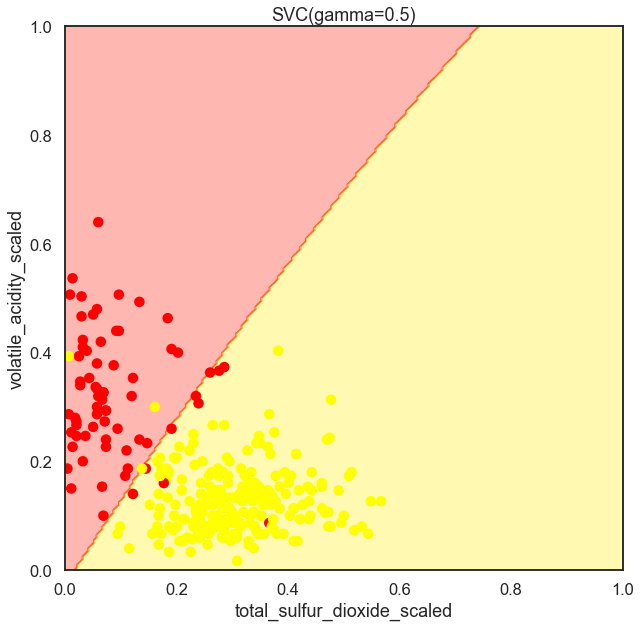

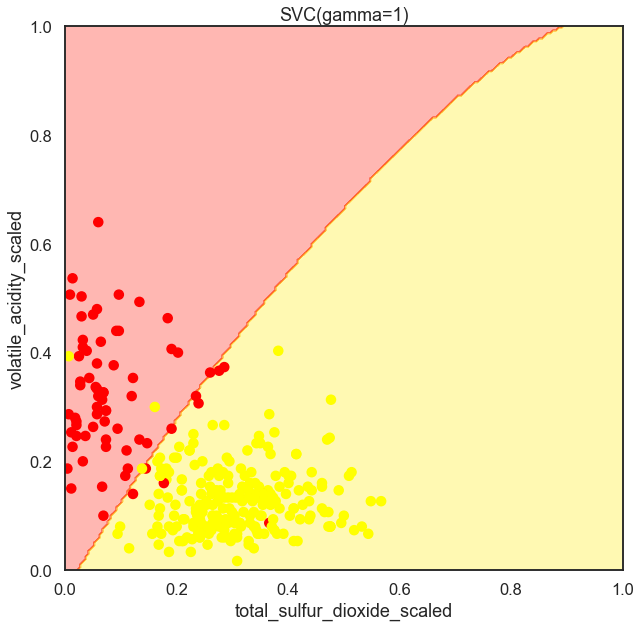

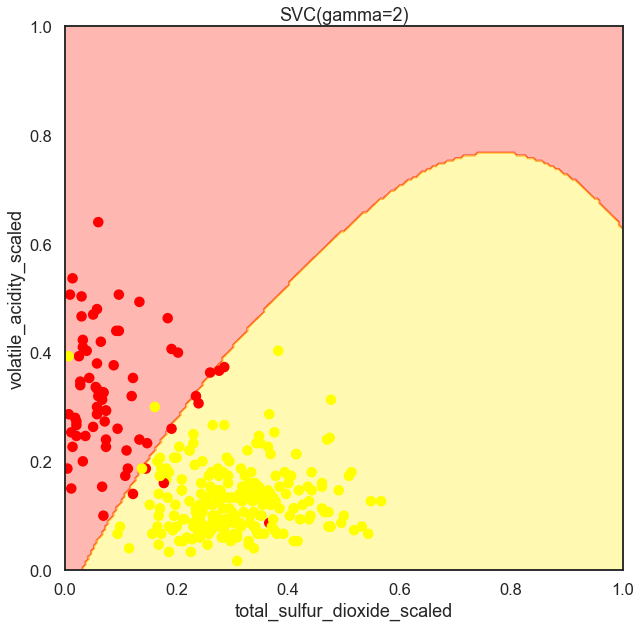

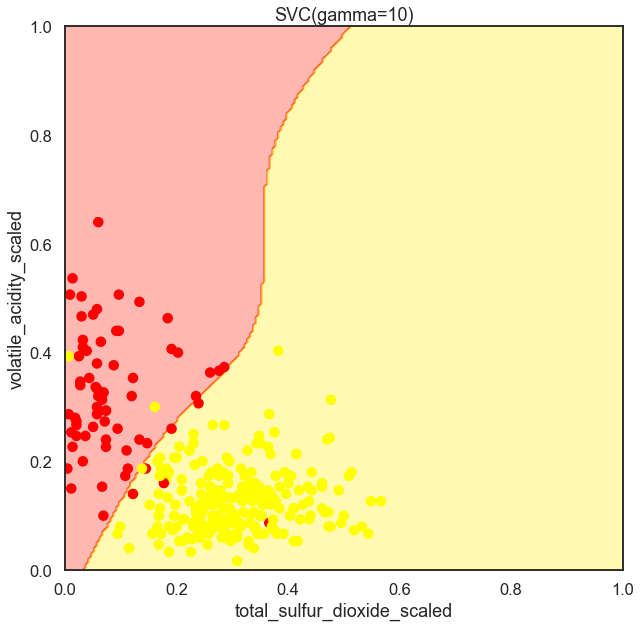

In [109]:
from sklearn.svm import SVC
svc=SVC()
gammas = [.5, 1, 2, 10]

for g in gammas:
    svc=SVC(kernel='rbf',gamma=g)
    plot_decision_boundary(svc,x,y)
    

***` We conclude that increasing gamma leads to overfitting as the classifier tries to perfectly fit the training data `***

__Here we check for different values of C which is another hyperparameter; note that the gamma in this case will be constant__

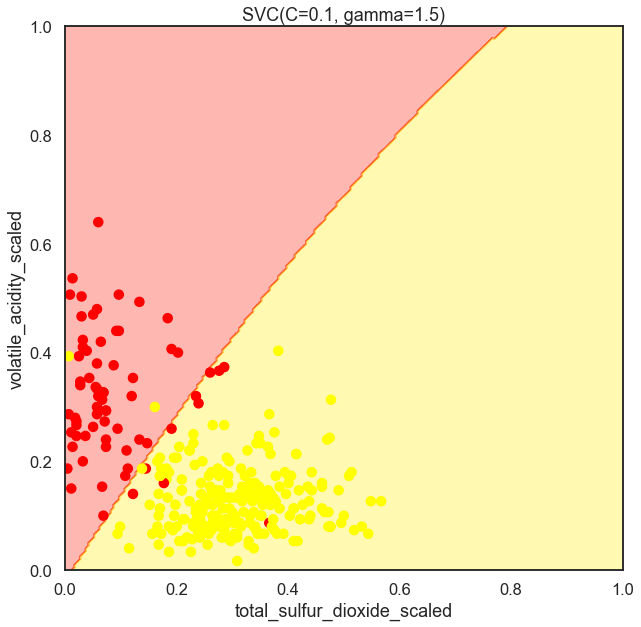

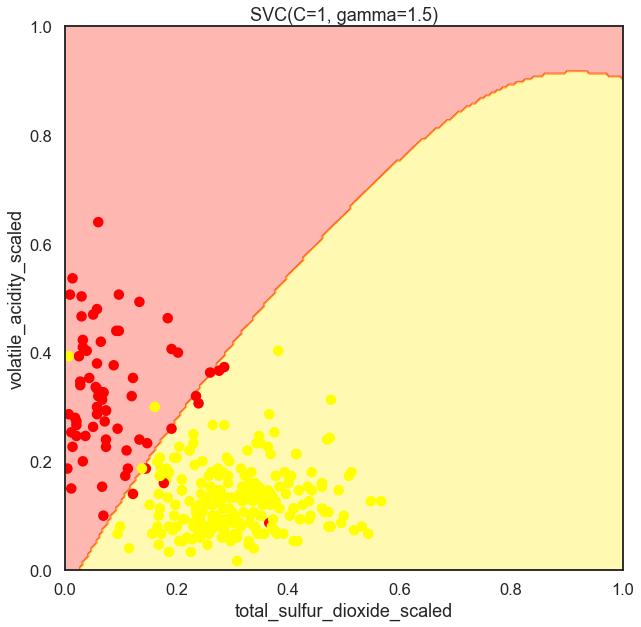

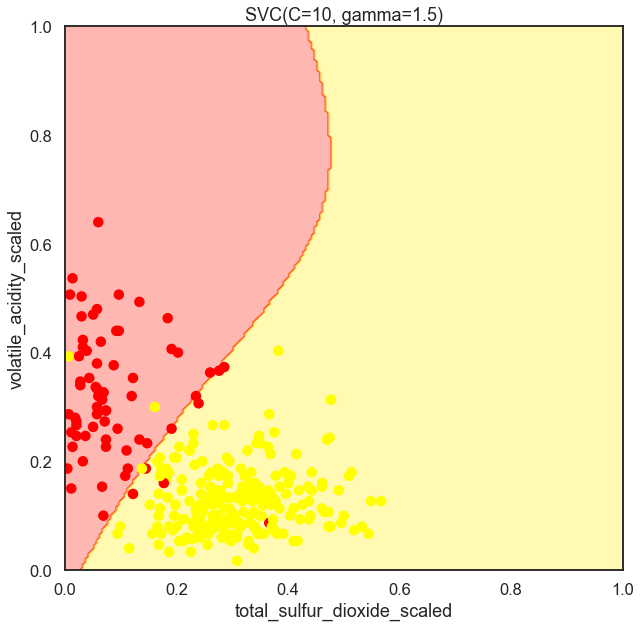

In [111]:
Cs = [.1, 1, 10]
for c in Cs:
    svc=SVC(kernel='rbf',gamma=1.5,C=c)
    plot_decision_boundary(svc,x,y)

***`Here we observe an inverse relationship of C with gamma. As C falls, it leads to higher regularization which in turn leads to simpler model. As C rises, reularizaion falls and the complexity of the model increases which is more prone to overfitting `***

# Kernel approximations and comparing Execution times

___This contains functions that approximate the feature mappings that correspond to certain kernels, as they are used for example in support vector machines (see Support Vector Machines). The following feature functions perform non-linear transformations of the input, which can serve as a basis for linear classification or other algorithms.___

___The advantage of using approximate explicit feature maps compared to the kernel trick, which makes use of feature maps implicitly, is that explicit mappings can be better suited for online learning and can significantly reduce the cost of learning with very large datasets. Standard kernelized SVMs do not scale well to large datasets, but using an approximate kernel map it is possible to use much more efficient linear SVMs. In particular, the combination of kernel map approximations with SGDClassifier can make non-linear learning on large datasets possible.___

___Since there has not been much empirical work using approximate embeddings, it is advisable to compare results against exact kernel methods when possible.___

` We first fit the SVC with the RBF kernel on our original data set.`

In [122]:
from sklearn.svm import SVC

y=df.color=='red' #The model will take True as 1 and False as 0.
x=df[df.columns[:-1]]
svc=SVC(kernel='rbf')

In [123]:
y

0        True
1        True
2        True
3        True
4        True
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Name: color, Length: 6497, dtype: bool

#### Execution time for a SVC in fitting a model. The `timeit` functionality helps us in keeping the track of the execution.

In [125]:
%%timeit
svc.fit(x,y)

221 ms ± 6.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


__Hence we see that it takes 221 milliseconds on this data set with a confidence interval of +- 6.83 milliseconds.__

#### Now we check with the Nystroem functionality which is a kernal approximation for mapping to higher dimensions in order for us to fit a linear classifier. The fitting of the classifier is even sped up with the use of Stochastic Gradient Descent Classier or the SGD classifier.

In [131]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
ny = Nystroem(kernel='rbf')
x_transformed = ny.fit_transform(x)
sgd=SGDClassifier()

In [132]:
%%timeit
sgd.fit(x_transformed,y)

47.2 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


__Hence we see that execution time has fallen. This difference is more pronounced when we test it on large data sets__

`We just augment our x and y data sets 5 times in order to see the profound effects of the kernel approximations in terms of fitting the model.`

In [138]:
x2 = pd.concat([x]*5)
y2 = pd.concat([y]*5)

In [139]:
%%timeit
svc.fit(x2,y2)

5.42 s ± 481 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [140]:
%%timeit
x2_transformed=ny.fit_transform(x2)
sgd.fit(x2_transformed,y2)

358 ms ± 28.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### It is quite evident how kernel approximations are incredibly efficient in terms of execution though as stated above that they should be compared with the kernel methods as they might reduce the overall accuracy in some cases.